# Support Vector Machine (SVM)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Loading DataSet
msrm=pd.read_csv('mushroom.csv')
# Primary Evaluation
msrm.head()
msrm.info()
msrm.describe()
msrm.isnull().sum()
msrm.drop('Unnamed: 0',axis=1,inplace=True)
#msrm.nunique()

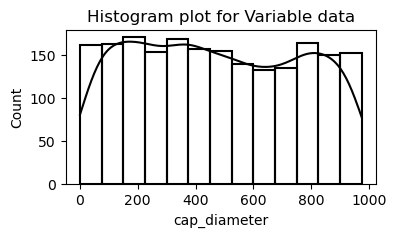

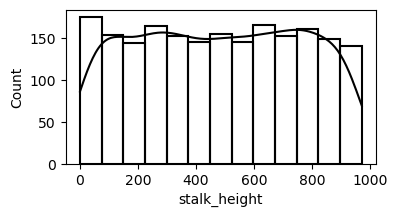

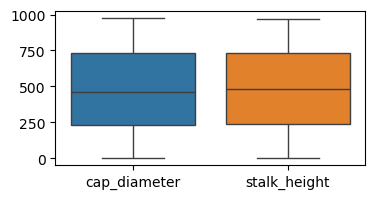

In [29]:
# Raw Data Visualization
# Histogram plot
plt.figure(figsize=(4,2))
sns.histplot(msrm['cap_diameter'],kde=True,fill=False,color='k')
plt.title('Histogram plot for Variable data')
plt.show()
plt.figure(figsize=(4,2))
sns.histplot(msrm['stalk_height'],kde=True,fill=False,color='k')
plt.show()
# Box plot for outliers detection
plt.figure(figsize=(4,2))
sns.boxplot(msrm[['cap_diameter','stalk_height']])
plt.show()

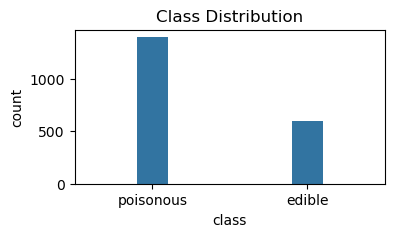

In [5]:
# Bargraph for Classes
plt.figure(figsize=(4, 2))
sns.countplot(x=msrm['class'], width=0.2)
plt.title("Class Distribution")
plt.show()

In [6]:
# Data Processing
# Encoding categorical values to numeric
from sklearn.preprocessing import LabelEncoder
label_encoders={}
for y in msrm.columns:
    enc=LabelEncoder()
    msrm[y]=enc.fit_transform(msrm[y])
    label_encoders[y]=enc
msrm.head()
# Dividing Data into X and Y
X=msrm.drop('class',axis=1)
y=msrm['class']

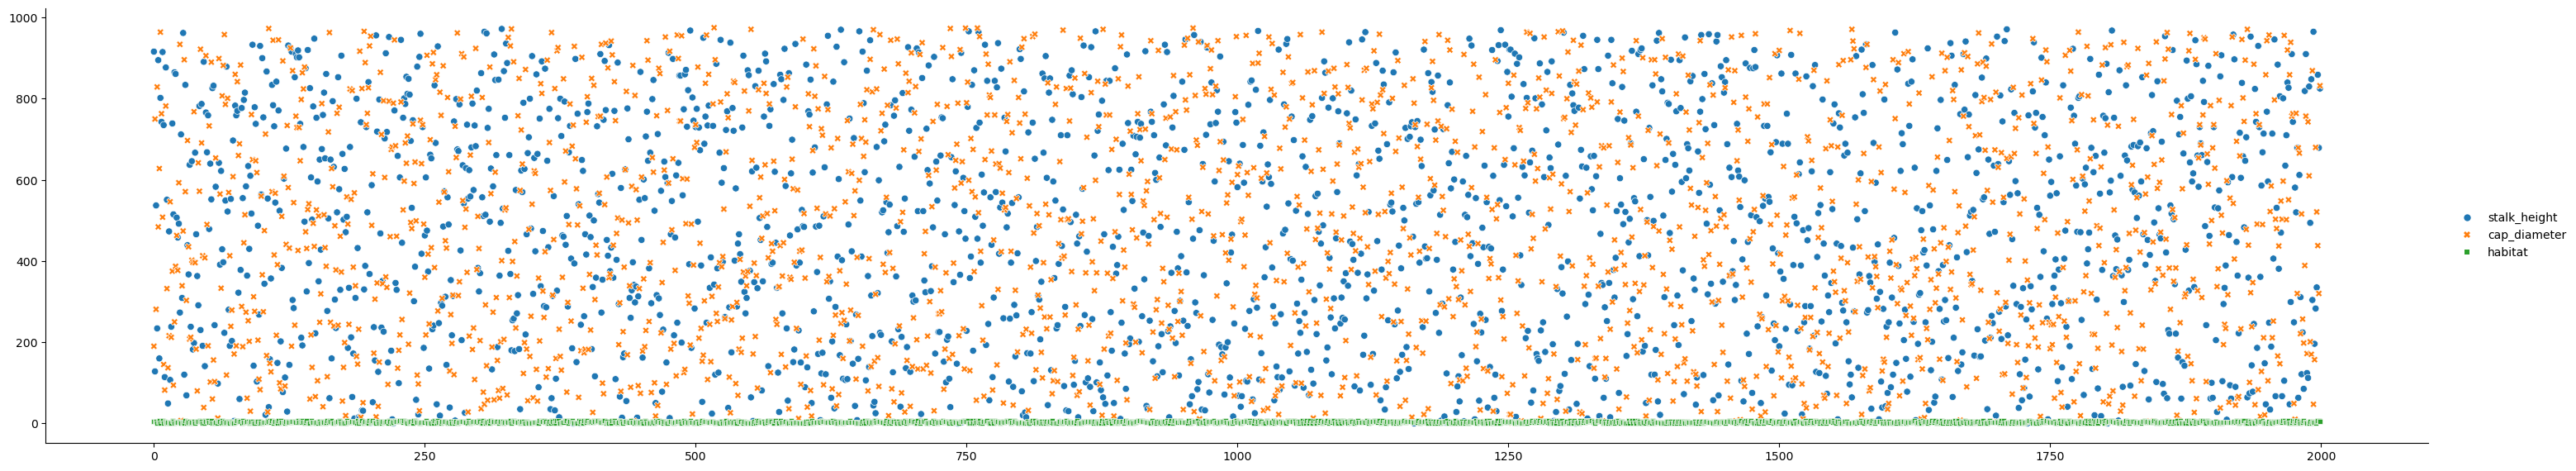

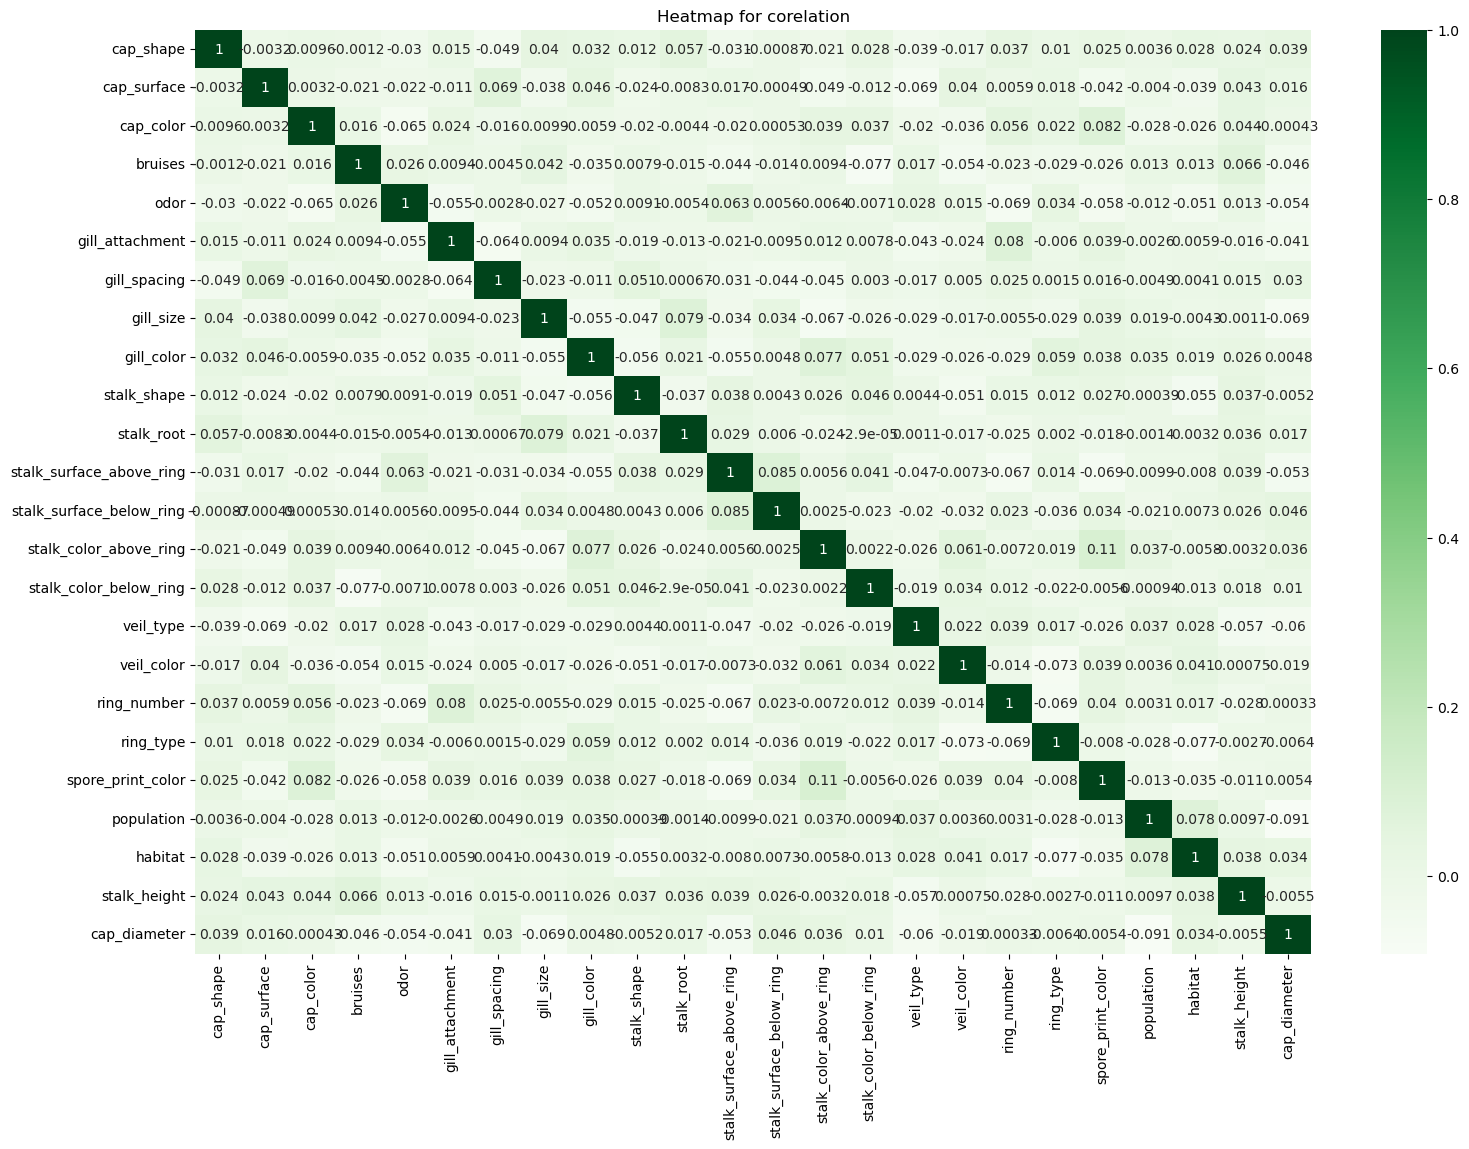

In [30]:
# Scatter plot on cleaned data
sns.relplot(X[['stalk_height','cap_diameter','habitat']],height=6,aspect=5,sizes=msrm['class'])
plt.show()
# Heat map for corelation detection
plt.figure(figsize=(18,12))
sns.heatmap(X.corr(),cmap='Greens',annot= True)
plt.title('Heatmap for corelation')
plt.show()

In [8]:
# Spliting into Traing and Testing sections
from sklearn.model_selection import train_test_split,GridSearchCV
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
# Training and Evaluating Model
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,f1_score,confusion_matrix
svm=SVC(C=0.1,gamma='scale')
svm.fit(X_train,y_train)
# predecting training Y from X_train
yhat_train=svm.predict(X_train)
print(f'Accuracy Score of Train data :{accuracy_score(y_train,yhat_train):.2g}')

Accuracy Score of Train data :0.71


In [9]:
# Hyper parameter tuning
param_grid={
    'C':[0.1,1,5],
    'gamma':['scale','auto',0.1],
}
grid_search=GridSearchCV(estimator=svm,param_grid=param_grid,scoring='accuracy',cv=5,n_jobs=-1)
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'C': 1, 'gamma': 'auto'}

In [10]:
# Selecting best parameters
model=grid_search.best_estimator_
# Predecting Y test values from X test and evaluating its metrics
ypred=model.predict(X_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       1.00      0.65      0.79       133
           1       0.85      1.00      0.92       267

    accuracy                           0.89       400
   macro avg       0.93      0.83      0.86       400
weighted avg       0.90      0.89      0.88       400



In [11]:
# Visualization of data based on classes
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2,init='pca',learning_rate=0.2,metric='euclidean')
arr=tsne.fit_transform(X)
vis_df=pd.DataFrame(arr,columns=['c1','c2'])

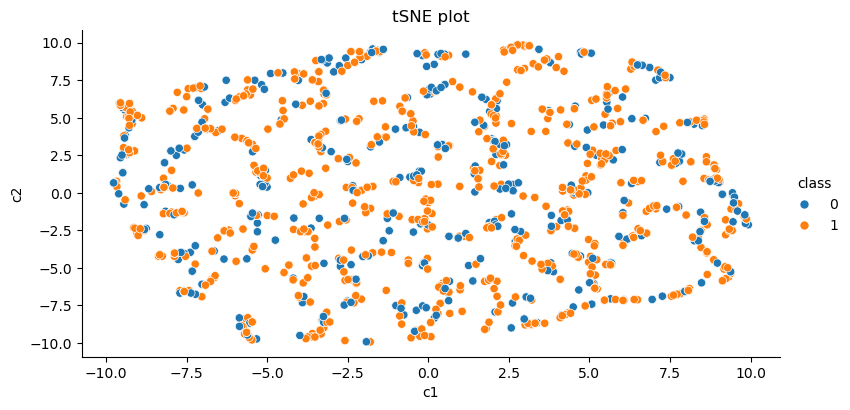

In [12]:
# Ploting scatter plot based on TSNE data
vis_df['class']=msrm['class']
sns.relplot(vis_df,x='c1',y='c2',kind='scatter',hue='class',height=4,aspect=2)
plt.title('tSNE plot')
plt.show()

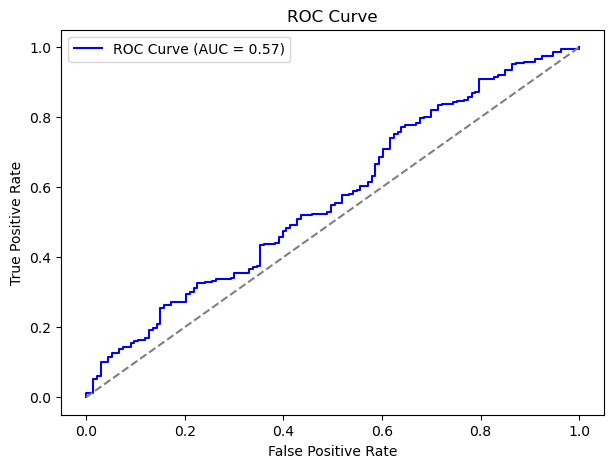

In [31]:
# Visualising Roc curve for Evaluating its metrics
y_pred_prob = svm.decision_function(X_test)
from sklearn.metrics import roc_curve,auc
if len(np.unique(y_test)) == 2:
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(7, 5))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()


### Comparison and Analysis

    1.Strengths
    
        1.Effective for High-Dimensional Data.
        2.Handles Non-Linearly Separable Data with Kernels.
        3.Robust to Outliers with Soft Margin.
        4.Well-Suited for Binary Classification.
        
    Weaknesses
    
        1.Computational Complexity with Large Data.
        2.Sensitivity to Class Imbalance.
        3.Parameter Tuning Complexity.
        4.Feature Engineering Required for Categorical Data.

    2.Practical implications of SVM in real-world classification tasks

        1.High Accuracy in Complex Decision Boundaries
        2.Works Well with High-Dimensional Data
        3.Effective for Small to Medium Datasets

        Applications (Real time)
        1.Text Classification and NLP
        2.Manufacturing and Quality Control
        3.CyberSecurity and Intrusion detection
        4.Healthcare and Medical Diagnosis
        5.Finance and Fraud detection